# Modelo para Classificação de e-mail como spam ou não-spam
Alunos:
- José Augusto
- Maria Helena
- Rodrigo de França

## Intalação da biblioteca ucimlrepo para baixar carregar o dataset

In [ ]:
pip install ucimlrepo

## Importação das Bibliotecas Utilizadas no Projeto

In [ ]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


## Carregando o dataset

In [ ]:
# fetch dataset
spambase_ucirepo = fetch_ucirepo(id=94)

In [ ]:
spambase = spambase_ucirepo.data.original
X = spambase_ucirepo.data.features;
y = spambase_ucirepo.data.targets;


print(f"Quantidade de amostras: {len(X)}")
print(f"Quantidade de atributos: {len(X.columns)}")
print("Existem valores nulos" if X.isnull().values.any() else "Não existem valores nulos")
print(f"Quantidade de classes: {len(y['Class'].unique())}")
print(f"Classes: {y['Class'].unique()}")
spambase.head()

Quantidade de amostras: 4601
Quantidade de atributos: 57
Não existem valores nulos
Quantidade de classes: 2
Classes: [1 0]


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Verificando a estrutura dos dados

In [ ]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
'''Ele retorna uma tabela que contém estatísticas resumidas como:

count: O número de valores não nulos em cada coluna.
mean: A média dos valores de cada coluna.
std: O desvio padrão dos valores.
min: O valor mínimo em cada coluna.
25%: O primeiro quartil (25% dos valores estão abaixo deste valor).
50%: A mediana (50% dos valores estão abaixo deste valor).
75%: O terceiro quartil (75% dos valores estão abaixo deste valor).
max: O valor máximo em cada coluna.'''
spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


array([[<Axes: title={'center': 'word_freq_make'}>,
        <Axes: title={'center': 'word_freq_address'}>,
        <Axes: title={'center': 'word_freq_all'}>,
        <Axes: title={'center': 'word_freq_3d'}>,
        <Axes: title={'center': 'word_freq_our'}>,
        <Axes: title={'center': 'word_freq_over'}>,
        <Axes: title={'center': 'word_freq_remove'}>,
        <Axes: title={'center': 'word_freq_internet'}>],
       [<Axes: title={'center': 'word_freq_order'}>,
        <Axes: title={'center': 'word_freq_mail'}>,
        <Axes: title={'center': 'word_freq_receive'}>,
        <Axes: title={'center': 'word_freq_will'}>,
        <Axes: title={'center': 'word_freq_people'}>,
        <Axes: title={'center': 'word_freq_report'}>,
        <Axes: title={'center': 'word_freq_addresses'}>,
        <Axes: title={'center': 'word_freq_free'}>],
       [<Axes: title={'center': 'word_freq_business'}>,
        <Axes: title={'center': 'word_freq_email'}>,
        <Axes: title={'center': 'word_f

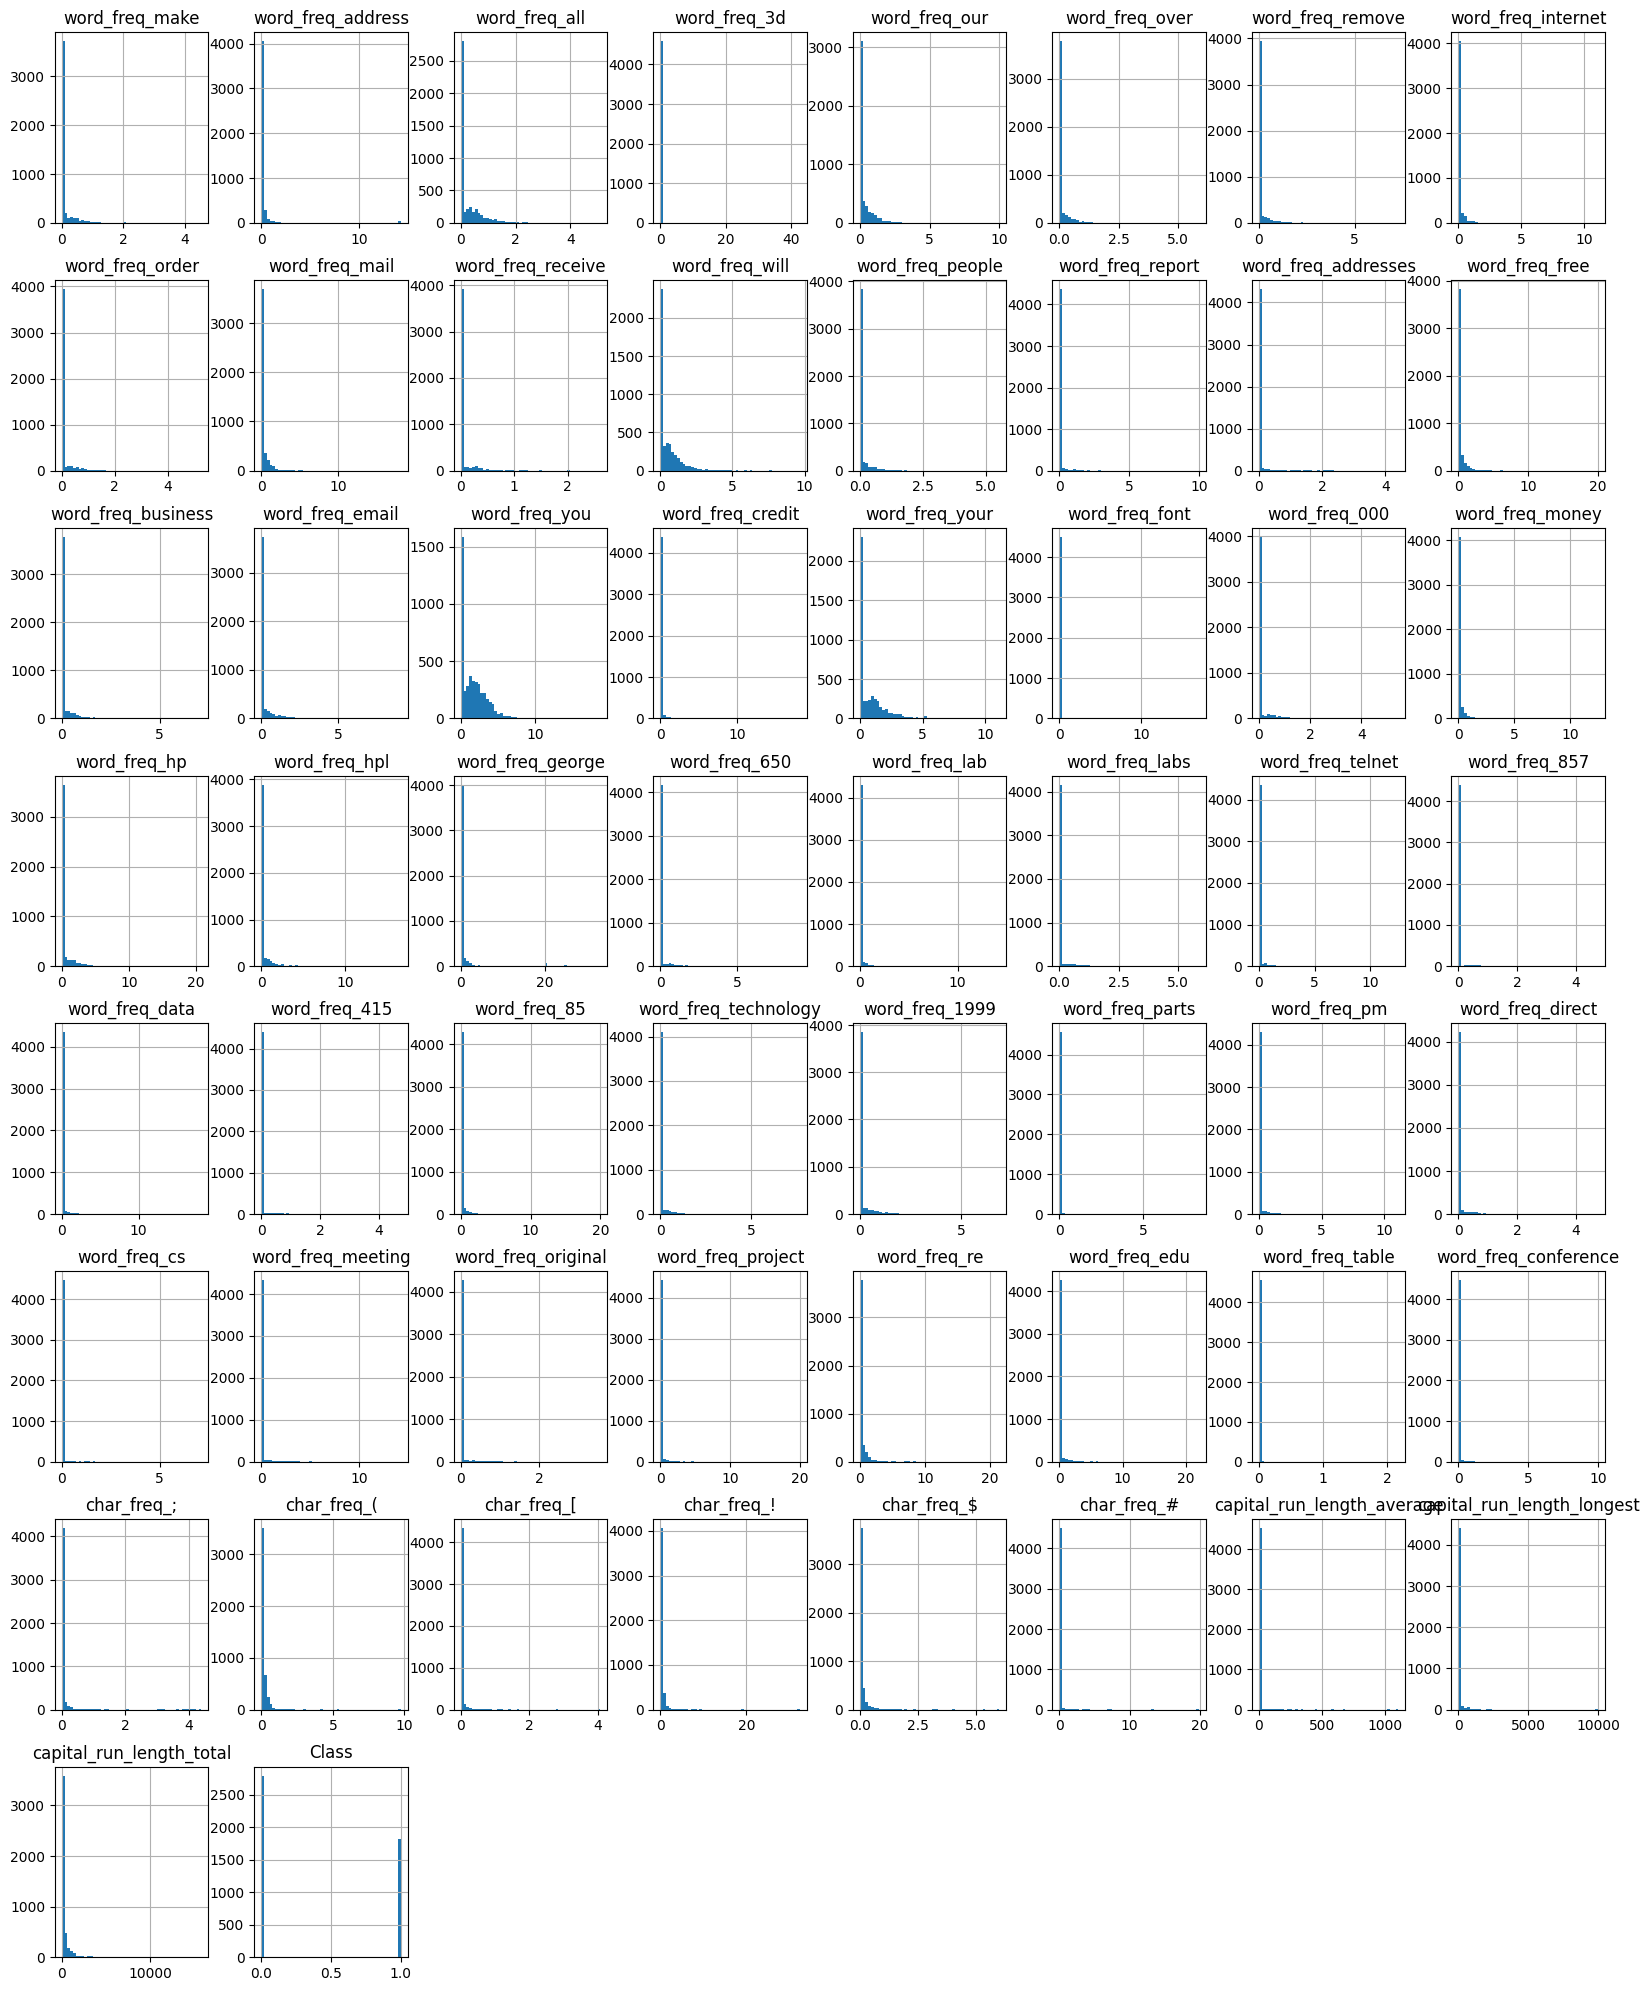

In [ ]:
spambase.hist(bins=50, figsize=(20,25))

# Tratamento de Dados

In [ ]:
# Verificando os valores máximos e mínimos e máximos de cada propriedade para verificar a necessidade de normalização.
desc = spambase.describe()
tabela = desc.loc[['min', 'max']].T.reset_index()
tabela.columns = ['nome da propriedade', 'valor mínimo', 'valor máximo']
tabela

,nome da propriedade,valor mínimo,valor máximo
0,word_freq_make,0.0,4.540
1,word_freq_address,0.0,14.280
2,word_freq_all,0.0,5.100
3,word_freq_3d,0.0,42.810
4,word_freq_our,0.0,10.000
5,word_freq_over,0.0,5.880
6,word_freq_remove,0.0,7.270
7,word_freq_internet,0.0,11.110
8,word_freq_order,0.0,5.260
9,word_freq_mail,0.0,18.180


In [ ]:
# Verificando balanceamento das classes
print(y.value_counts())

Class
0        2788
1        1813
Name: count, dtype: int64


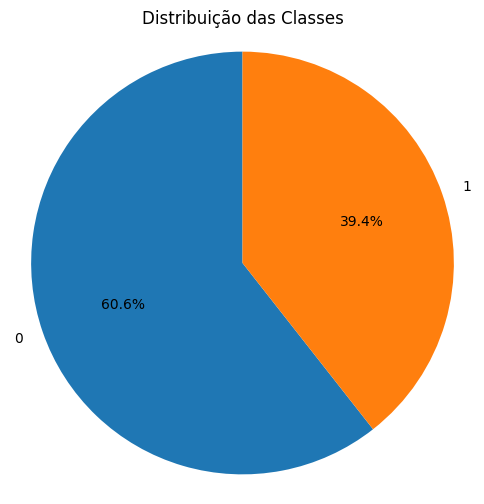

In [ ]:
class_counts = y['Class'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Classes')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()


## Separando dados para Validação e Treinamento

In [ ]:
X, X_validation, y, y_validation = train_test_split(
    X,
    y,
    test_size=0.1,       # Fração para validação (10%)
    random_state=42,     # Semente para resultados reproduzíveis
    stratify=y           # Estratifica para manter a proporção de classes
);

print(f"Quantidade de amostras de treinamento: {len(X)}")
print(f"Quantidade de amostras de validação: {len(X_validation)}")

Quantidade de amostras de treinamento: 4140
Quantidade de amostras de validação: 461


### Normalizando dados

In [ ]:
# denifindo normalizador
scaler = StandardScaler()

# treinando o normalizador
scaler.fit(X)

StandardScaler()

In [ ]:
# normalizando dados
X = scaler.transform(X)
X

array([[-0.34014976, -0.1642276 , -0.55956132, ..., -0.08244412,
        -0.02427137, -0.32099897],
       [ 1.27344911,  0.20083338,  0.1211568 , ...,  0.05887378,
         2.72334287,  3.60201738],
       [-0.34014976, -0.1642276 , -0.55956132, ..., -0.11252017,
        -0.19474378,  0.30438494],
       ...,
       [ 1.62844086, -0.1642276 , -0.55956132, ..., -0.0248161 ,
        -0.089452  , -0.32606965],
       [ 1.46708097, -0.1642276 ,  1.12221286, ..., -0.03913948,
        -0.02427137,  0.1759277 ],
       [-0.34014976, -0.1642276 , -0.55956132, ..., -0.0841167 ,
        -0.18471599, -0.36663509]])

# Validação Cruzada com StratifiedKFold e Otimização dos Hiperparâmetros


In [ ]:
# Configurando o StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# Definindo o modelo e hiperparâmetros
model = RandomForestClassifier(random_state=12)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Configurando o GridSearchCV e Realizando a busca pelos hiperparâmetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y.squeeze())
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by='rank_test_score')
colunas = ["rank_test_score", "mean_test_score", 'param_max_depth', 'param_min_samples_split', 'param_n_estimators']
df[colunas]

,rank_test_score,mean_test_score,param_max_depth,param_min_samples_split,param_n_estimators
28,1,0.955072,30,2,200
29,2,0.954831,30,2,300
27,3,0.954348,30,2,100
2,4,0.954106,None,2,300
1,5,0.953865,None,2,200
0,6,0.953382,None,2,100
30,7,0.953140,30,5,100
5,7,0.953140,None,5,300
18,7,0.953140,20,2,100
31,10,0.952899,30,5,200


# Avaliação dos Resultados

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


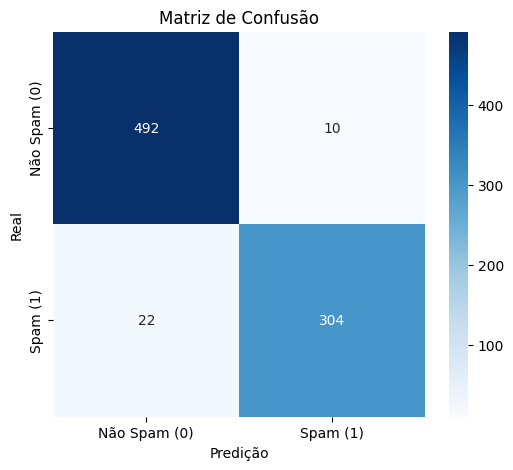


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       502
           1       0.97      0.93      0.95       326

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828

Acurácia: 0.961352657004831
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


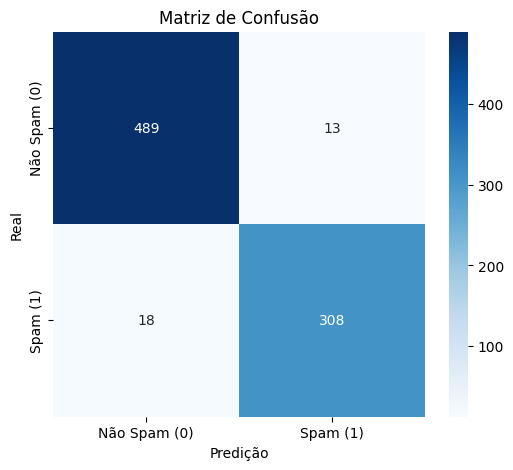


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       502
           1       0.96      0.94      0.95       326

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828

Acurácia: 0.9625603864734299
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


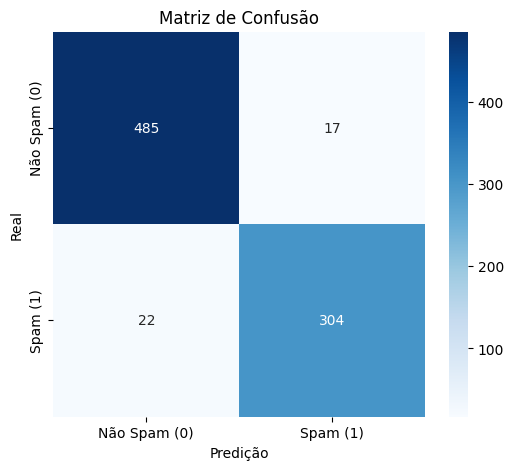


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.95      0.93      0.94       326

    accuracy                           0.95       828
   macro avg       0.95      0.95      0.95       828
weighted avg       0.95      0.95      0.95       828

Acurácia: 0.9528985507246377
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


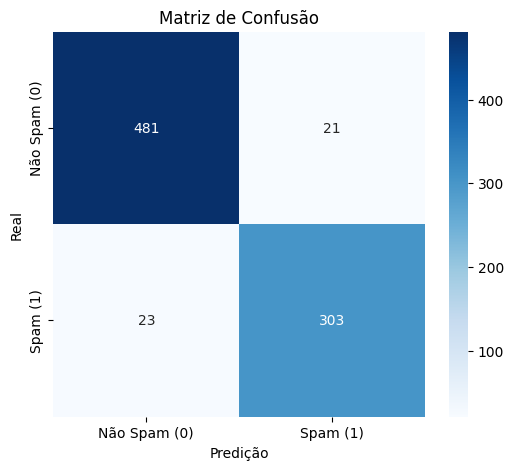


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       502
           1       0.94      0.93      0.93       326

    accuracy                           0.95       828
   macro avg       0.94      0.94      0.94       828
weighted avg       0.95      0.95      0.95       828

Acurácia: 0.9468599033816425
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


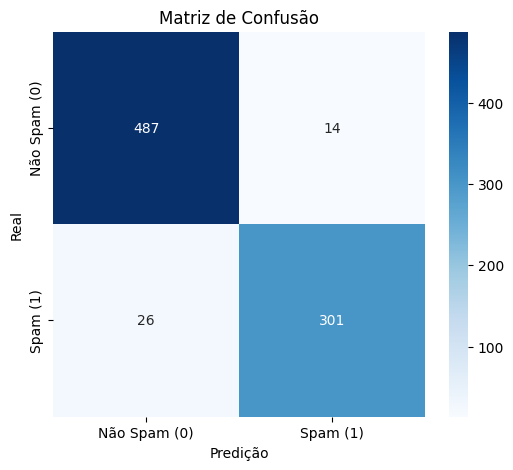


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       501
           1       0.96      0.92      0.94       327

    accuracy                           0.95       828
   macro avg       0.95      0.95      0.95       828
weighted avg       0.95      0.95      0.95       828

Acurácia: 0.9516908212560387
------------------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params, random_state=12)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Spam (0)', 'Spam (1)'], yticklabels=['Não Spam (0)', 'Spam (1)'])
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 60)


# Testando a previsão

In [ ]:
# Escalonamento dos dados de validação
X_validation_scaled = scaler.transform(X_validation)

# Realizando a previsão
previsoes = best_model.predict(X_validation_scaled)

# Importando métricas para matriz de confusão e acurácia
from sklearn.metrics import confusion_matrix, accuracy_score

# Calcula a matriz de confusão e a acurácia
matriz_confusao = confusion_matrix(y_validation, previsoes)
acuracia = accuracy_score(y_validation, previsoes)

# Exibe a matriz de confusão e o score
class_labels = ["Não Spam", "Spam"]
df_matriz = pd.DataFrame(
    matriz_confusao,
    index=[f"Verdadeiro: {label}" for label in class_labels],
    columns=[f"Predito: {label}" for label in class_labels]
)

print("Matriz de Confusão em DataFrame:")
print(df_matriz, "\n")


print(f"Acurácia: {acuracia:.2f}\n")

# Exibe a classificação individual de cada amostra
for i, previsao in enumerate(previsoes):
    if previsao == 0:
        print(f"Amostra {i+1} -> Não é spam.")
    else:
        print(f"Amostra {i+1} -> É spam.")


Matriz de Confusão em DataFrame:
                      Predito: Não Spam  Predito: Spam
Verdadeiro: Não Spam                270              9
Verdadeiro: Spam                     20            162 

Acurácia: 0.94

Amostra 1 -> Não é spam.
Amostra 2 -> Não é spam.
Amostra 3 -> É spam.
Amostra 4 -> Não é spam.
Amostra 5 -> Não é spam.
Amostra 6 -> Não é spam.
Amostra 7 -> Não é spam.
Amostra 8 -> Não é spam.
Amostra 9 -> É spam.
Amostra 10 -> Não é spam.
Amostra 11 -> É spam.
Amostra 12 -> Não é spam.
Amostra 13 -> Não é spam.
Amostra 14 -> É spam.
Amostra 15 -> É spam.
Amostra 16 -> Não é spam.
Amostra 17 -> Não é spam.
Amostra 18 -> Não é spam.
Amostra 19 -> Não é spam.
Amostra 20 -> Não é spam.
Amostra 21 -> É spam.
Amostra 22 -> Não é spam.
Amostra 23 -> É spam.
Amostra 24 -> Não é spam.
Amostra 25 -> Não é spam.
Amostra 26 -> É spam.
Amostra 27 -> Não é spam.
Amostra 28 -> Não é spam.
Amostra 29 -> É spam.
Amostra 30 -> Não é spam.
Amostra 31 -> Não é spam.
Amostra 32 -> Não é spa